In [1]:
import pandas as pd
date = ["6/1", "6/2", "6/3", "6/4", "6/5"]
high = pd.Series([42800, 42700, 42050, 42950, 43000], index = date)
low = pd.Series([42150, 42150, 41300, 42150, 42350], index = date)

# 변동폭

diff = high - low
diff

6/1    650
6/2    550
6/3    750
6/4    800
6/5    650
dtype: int64

In [2]:
diff.max()

800

In [4]:
diff.idxmax() # 가장 큰 값이 있는 날짜

'6/4'

In [5]:
diff.idxmin() # 가장 작은 값이 있는 날짜

'6/2'

In [8]:
# 수익률 

profit= high / low
profit

6/1    1.015421
6/2    1.013049
6/3    1.018160
6/4    1.018980
6/5    1.015348
dtype: float64

In [10]:
# 누적 수익률
profit.cumprod().iloc[-1]

1.0836101509172456

In [13]:
def myfunc(x):
    x= x.replace(",",'')
    return int(x)

s = pd.Series(['1,234','5,678','9,876']) # 돈이면 ,가 있을 확률이 많음
s.apply(myfunc)

0    1234
1    5678
2    9876
dtype: int64

In [24]:
import numpy as np

def myfunc(x):
    x= x.replace(",",'')
    return int(x)

data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]

df = pd.DataFrame(data=data, columns=columns)

df['03/02']=df['03/02'].apply(myfunc).astype(np.int32) # int32 : +-20억
df['03/03']=df['03/03'].apply(myfunc).astype(np.int32) # int64 : 경단위
df['03/04']=df['03/04'].apply(myfunc).astype(np.int32)
df

,03/02,03/03,03/04
0,1000,1100,1510
1,1410,1420,1790
2,850,900,1185


In [29]:
# 순위 처리 
df = pd.read_excel(r"C:\Users\minyeol\Desktop\대구은행\금융데이터\성적 처리.xlsx",sheet_name = "Sheet1")
df['총합'] = df.iloc[:,2:].sum(axis=1)
df.sort_values(['반','총합'],ascending=[True,False])

,반,성명,국어,영어,수학,사회,과학,총합
0,1반,홍길동,93,80,94,73,64,404
9,1반,신성삼,64,66,59,91,86,366
17,1반,유비비,67,94,61,61,52,335
16,1반,소행성,62,58,58,62,73,313
18,2반,이관우,91,65,57,79,93,385
19,2반,장비비,52,82,93,81,75,383
8,2반,이미로,59,54,75,90,82,360
11,2반,장발장,85,51,64,80,68,348
2,3반,이삼상,94,74,86,90,70,414
15,3반,조미료,86,68,97,56,85,392


In [33]:
# 순위(average) : 3등이 2명이면 3.5등으로 처리하고 다음 등수를 5등
df['순위']=df['총합'].rank(ascending=False,method='max') 
df

,반,성명,국어,영어,수학,사회,과학,총합,순위
0,1반,홍길동,93,80,94,73,64,404,4.0
1,5반,백일홍,93,63,76,84,92,408,2.0
2,3반,이삼상,94,74,86,90,70,414,1.0
3,4반,정말로,83,55,64,90,65,357,13.0
4,5반,한번도,87,95,66,75,60,383,8.0
5,4반,이철수,53,81,59,88,69,350,14.0
6,3반,김영자,71,71,51,84,57,334,17.0
7,5반,다니엘,87,54,95,71,97,404,4.0
8,2반,이미로,59,54,75,90,82,360,11.0
9,1반,신성삼,64,66,59,91,86,366,10.0


In [34]:
# 3등이 2명이면 둘다 3등처리하고 다음 등수를 5등
df['순위']=df['총합'].rank(ascending=False,method='min')
df

,반,성명,국어,영어,수학,사회,과학,총합,순위
0,1반,홍길동,93,80,94,73,64,404,3.0
1,5반,백일홍,93,63,76,84,92,408,2.0
2,3반,이삼상,94,74,86,90,70,414,1.0
3,4반,정말로,83,55,64,90,65,357,12.0
4,5반,한번도,87,95,66,75,60,383,7.0
5,4반,이철수,53,81,59,88,69,350,14.0
6,3반,김영자,71,71,51,84,57,334,17.0
7,5반,다니엘,87,54,95,71,97,404,3.0
8,2반,이미로,59,54,75,90,82,360,11.0
9,1반,신성삼,64,66,59,91,86,366,10.0


In [35]:
# 3등이 2명이면, 처음 발견한 3등은 3등, 다음에 발견한 3등은 4등 (선착순)
df['순위']=df['총합'].rank(ascending=False,method='first')
df

,반,성명,국어,영어,수학,사회,과학,총합,순위
0,1반,홍길동,93,80,94,73,64,404,3.0
1,5반,백일홍,93,63,76,84,92,408,2.0
2,3반,이삼상,94,74,86,90,70,414,1.0
3,4반,정말로,83,55,64,90,65,357,12.0
4,5반,한번도,87,95,66,75,60,383,7.0
5,4반,이철수,53,81,59,88,69,350,14.0
6,3반,김영자,71,71,51,84,57,334,17.0
7,5반,다니엘,87,54,95,71,97,404,4.0
8,2반,이미로,59,54,75,90,82,360,11.0
9,1반,신성삼,64,66,59,91,86,366,10.0


In [36]:
# min이랑 같음. 3등이 2명이면 둘다 3등처리하고 다음 등수를 4등
df['순위']=df['총합'].rank(ascending=False,method='dense')
df

,반,성명,국어,영어,수학,사회,과학,총합,순위
0,1반,홍길동,93,80,94,73,64,404,3.0
1,5반,백일홍,93,63,76,84,92,408,2.0
2,3반,이삼상,94,74,86,90,70,414,1.0
3,4반,정말로,83,55,64,90,65,357,10.0
4,5반,한번도,87,95,66,75,60,383,6.0
5,4반,이철수,53,81,59,88,69,350,11.0
6,3반,김영자,71,71,51,84,57,334,14.0
7,5반,다니엘,87,54,95,71,97,404,3.0
8,2반,이미로,59,54,75,90,82,360,9.0
9,1반,신성삼,64,66,59,91,86,366,8.0


In [39]:
data = [
    {"cd":"A060310", "nm":"3S", "close":"2,920"},
    {"cd":"A095570", "nm":"AJ네트웍스", "close":"6,250"},
    {"cd":"A006840", "nm":"AK홀딩스", "close":"29,700"},
    {"cd":"A054620", "nm":"APS홀딩스", "close":"19,400"}
]

df = pd.DataFrame(data=data)
df["cd"] = df["cd"].str[1:] # 순수한 종목코드만 가지고 올때 A같은거 빼고
df['close']=df['close'].str.replace(",","").astype(np.int32) # ,빼기
df

,cd,nm,close
0,060310,3S,2920
1,095570,AJ네트웍스,6250
2,006840,AK홀딩스,29700
3,054620,APS홀딩스,19400


In [42]:
data = [
    {"cd":"A060310", "nm":"3S", "open":2920, "close":2800},
    {"cd":"A095570", "nm":"AJ네트웍스", "open":1920, "close":1900},
    {"cd":"A006840", "nm":"AK홀딩스", "open":2020, "close":2010},
    {"cd":"A054620", "nm":"APS홀딩스", "open":3120, "close":3200}
]

df = pd.DataFrame(data=data)
df = df.set_index('cd')
df

,nm,open,close
cd,,,
A060310,3S,2920,2800
A095570,AJ네트웍스,1920,1900
A006840,AK홀딩스,2020,2010
A054620,APS홀딩스,3120,3200


In [45]:
# 쿼리 사용

#df.query("""nm == '3S'""")
#df.query("""open> close""")
df.query("""nm in ['3S', 'AK홀딩스']""")

,nm,open,close
cd,,,
A060310,3S,2920,2800
A006840,AK홀딩스,2020,2010


In [47]:
name = 'AJ네트웍스'
df.query("""nm==@name""")

,nm,open,close
cd,,,
A095570,AJ네트웍스,1920,1900


In [49]:
# filter
data = [
    [1416, 1416, 2994, 1755],
    [6.42, 17.63, 21.09, 13.93],
    [1.10, 1.49, 2.06, 1.88]
]

columns = ["2018/12", "2019/12", "2020/12", "2021/12(E)"]
index = ["DPS", "PER", "PBR"]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.filter(items=['2018/12'])

,2018/12
DPS,1416.00
PER,6.42
PBR,1.10


In [50]:
df.filter(items=['PER'],axis=0)

,2018/12,2019/12,2020/12,2021/12(E)
PER,6.42,17.63,21.09,13.93


In [51]:
# 정규표현식 : 문자열에서 패턴찾는 기술
df.filter(regex = r'2020') # 2020이 들어간 패턴을 찾고싶어.

,2020/12
DPS,2994.00
PER,21.09
PBR,2.06


In [52]:
df.filter(regex = r'^201') # 201로 시작하는 패턴 찾기

,2018/12,2019/12
DPS,1416.00,1416.00
PER,6.42,17.63
PBR,1.10,1.49


In [53]:
df.filter(regex=r'R$',axis=0) # R로 끝나는 패턴을 찾고 싶어

,2018/12,2019/12,2020/12,2021/12(E)
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [56]:
df.filter(regex = r'\d{4}\/\d{2}$') # \d{4} : 4자리로 된 숫자패턴 찾고 싶어

,2018/12,2019/12,2020/12
DPS,1416.00,1416.00,2994.00
PER,6.42,17.63,21.09
PBR,1.10,1.49,2.06


In [58]:
import re
text ='''[STN뉴스] 반진혁 기자 = 손흥민의 거취에 시선이 집중되고 있다.

영국 매체 '커트오프사이드'는 16일 "손흥민의 토트넘 홋스퍼 경력은 곧 끝날 것으로 보인다"고 전망했다.

이어 "손흥민은 여전히 토트넘에서 가장 중요하고 영향력이 있는 선수다. 하지만, 32세라는 나이와 내년 여름 계약이 만료되므로 이번 시즌이 끝나고 떠나는 것이 논리적으로 타당한 시점이다"고 덧붙였다.

손흥민은 2015년 토트넘 합류 이후 꾸준하게 핵심 선수로 활약했다. 감독이 바뀌는 상황에서도 입지는 굳건했다. 2021/22시즌 프리미어리그(EPL) 득점왕에 등극하면서 정점을 찍기도 했다.

손흥민의 활약은 지난 시즌도 이어졌다. 측면이 아닌 최전방 공격수로 주로 출전하면서 득점력을 뽐냈다. 17골 10도움을 기록하면서 엄청난 퍼포먼스를 선보였다.

손흥민의 최전방 공격수로 활약은 측면 공격 자원이었지만, 스트라이커로 포지션을 변경 후 계속 유지 중인 우상 크리스티아누 호날두에 비유되기도 했다.

영국 '스카이스포츠'는 "손흥민은 양발로 마무리할 수 있는 능력을 보유했다. 측면에서 최전방 공격수로 포지션을 변경한 호날두와 비슷한 길을 걷는 중이다"고 언급했다.

특히, 10-10을 달성하게 되면서 통산 3회로 첼시에서 활약했던 디디에 드록바와 어깨를 나란히 했다.

손흥민은 EPL 출범 후 토트넘 소속으로 10-10을 3번 이상 달성한 유일한 선수가 됐다. 동료였던 해리 케인도 1회에 불과했다.

영국 매체 '기브미스포츠'가 공개한 정보에 따르면 손흥민은 토트넘에서 7번을 착용하고 활약한 9명의 선수 중 1위를 기록했다.

토트넘 역대 최고의 7번은 손흥민을 필두로 오스발도 아르딜레스, 아론 레넌, 대런 앤더튼, 리카르도 비야, 글렌 호들, 크리스 워들, 테리 메드윈, 테리 다이슨이 이름을 올렸다.

'기브미스포츠'는 "손흥민은 2015년 2,200만 파운드(약 386억)의 이적료로 토트넘에 합류했다. 적응기가 필요했지만, EPL 최고의 윙어 중 한 명이 됐다"고 언급했다.'''

re.findall('[가-힣a-zA-Z0-9]+',text) # 한글은 [가-힣] , 영어는 a-zA-Z 숫자 0-9 

['STN뉴스',
 '반진혁',
 '기자',
 '손흥민의',
 '거취에',
 '시선이',
 '집중되고',
 '있다',
 '영국',
 '매체',
 '커트오프사이드',
 '는',
 '16일',
 '손흥민의',
 '토트넘',
 '홋스퍼',
 '경력은',
 '곧',
 '끝날',
 '것으로',
 '보인다',
 '고',
 '전망했다',
 '이어',
 '손흥민은',
 '여전히',
 '토트넘에서',
 '가장',
 '중요하고',
 '영향력이',
 '있는',
 '선수다',
 '하지만',
 '32세라는',
 '나이와',
 '내년',
 '여름',
 '계약이',
 '만료되므로',
 '이번',
 '시즌이',
 '끝나고',
 '떠나는',
 '것이',
 '논리적으로',
 '타당한',
 '시점이다',
 '고',
 '덧붙였다',
 '손흥민은',
 '2015년',
 '토트넘',
 '합류',
 '이후',
 '꾸준하게',
 '핵심',
 '선수로',
 '활약했다',
 '감독이',
 '바뀌는',
 '상황에서도',
 '입지는',
 '굳건했다',
 '2021',
 '22시즌',
 '프리미어리그',
 'EPL',
 '득점왕에',
 '등극하면서',
 '정점을',
 '찍기도',
 '했다',
 '손흥민의',
 '활약은',
 '지난',
 '시즌도',
 '이어졌다',
 '측면이',
 '아닌',
 '최전방',
 '공격수로',
 '주로',
 '출전하면서',
 '득점력을',
 '뽐냈다',
 '17골',
 '10도움을',
 '기록하면서',
 '엄청난',
 '퍼포먼스를',
 '선보였다',
 '손흥민의',
 '최전방',
 '공격수로',
 '활약은',
 '측면',
 '공격',
 '자원이었지만',
 '스트라이커로',
 '포지션을',
 '변경',
 '후',
 '계속',
 '유지',
 '중인',
 '우상',
 '크리스티아누',
 '호날두에',
 '비유되기도',
 '했다',
 '영국',
 '스카이스포츠',
 '는',
 '손흥민은',
 '양발로',
 '마무리할',
 '수',
 '있는',
 '능력을',
 '보유했다',
 '측면에서',
 

In [73]:
data = [
    ["영업이익", "컨센서스", 1000, 1200],
    ["영업이익", "잠정치", 900, 1400],
    ["당기순이익", "컨센서스", 800, 900],
    ["당기순이익", "잠정치", 700, 800]
]

df = pd.DataFrame(data=data)
df = df.set_index([0,1])
df.index.names= ['재무연월','']
df.columns=['2020/06','2020/09']
# df.loc['영업이익']

df.loc[(slice(None),'컨센서스'),:] # 멀티인덱싱에서 컨센서스만 가져올때


재무연월     영업이익       당기순이익     
         컨센서스   잠정치  컨센서스  잠정치
2020/06  1000   900   800  700
2020/09  1200  1400   900  800

In [75]:
# 멀티컬럼
data = [
    [100, 900, 800, 700],
    [1200, 1400, 900, 800]
]

columns = [
    ['영업이익', '영업이익', '당기순이익', '당기순이익'],
    ['컨센서스', '잠정치', '컨센서스', '잠정치']
]

index = ["2020/06", "2020/09"]

df = pd.DataFrame(data=data, index=index, columns=columns)
# df['영업이익']
#df[('영업이익','컨센서스')]
df

영업이익       당기순이익     
         컨센서스   잠정치  컨센서스  잠정치
2020/06   100   900   800  700
2020/09  1200  1400   900  800

In [81]:
# stack : 열을 행으로 하나 내림 / unstack : 행을 열로 하나 올림

a = df.stack(level=0, future_stack=True).stack(level=0, future_stack=True) # 괄호안에 굳이 안 적어도 됨
a.reset_index()

,level_0,level_1,level_2,0
0,2020/06,영업이익,컨센서스,100
1,2020/06,영업이익,잠정치,900
2,2020/06,당기순이익,컨센서스,800
3,2020/06,당기순이익,잠정치,700
4,2020/09,영업이익,컨센서스,1200
5,2020/09,영업이익,잠정치,1400
6,2020/09,당기순이익,컨센서스,900
7,2020/09,당기순이익,잠정치,800


In [84]:
df.stack(level=0, future_stack=True).unstack()

컨센서스         잠정치      
         영업이익 당기순이익  영업이익 당기순이익
2020/06   100   800   900   700
2020/09  1200   900  1400   800

<Axes: xlabel='year'>

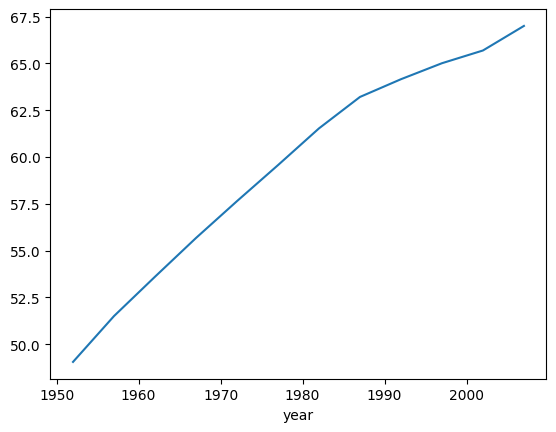

In [87]:
# Groupby

df = pd.read_csv(r"C:\Users\minyeol\Downloads\gapminder.tsv" , sep= '\t')
a= df.groupby('year')['lifeExp'].mean()
a.plot()

In [90]:
a= df.groupby(['year','continent'])['lifeExp'].mean()
a.to_excel('gapminder_result.xlsx')

In [95]:
# 대륙별로 나라가 몇개 있는지
# count() : 중복허용
# nunique() : 중복허용x
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [96]:
df.groupby('year')[['lifeExp','pop']].mean()

,lifeExp,pop
year,,
1952,49.057620,1.695040e+07
1957,51.507401,1.876341e+07
1962,53.609249,2.042101e+07
1967,55.678290,2.265830e+07
1972,57.647386,2.518998e+07
1977,59.570157,2.767638e+07
1982,61.533197,3.020730e+07
1987,63.212613,3.303857e+07
1992,64.160338,3.599092e+07


In [97]:
# 연도별로 기대수명 평균, 인구수 평균, 중앙값, GDP 최소값과 최대값

df.groupby('year').agg({'lifeExp':'mean','pop':['mean','median'],'gdpPercap':['min','max']})

lifeExp           pop               gdpPercap              
           mean          mean      median         min           max
year                                                               
1952  49.057620  1.695040e+07   3943953.0  298.846212  108382.35290
1957  51.507401  1.876341e+07   4282942.0  335.997115  113523.13290
1962  53.609249  2.042101e+07   4686039.5  355.203227   95458.11176
1967  55.678290  2.265830e+07   5170175.5  349.000000   80894.88326
1972  57.647386  2.518998e+07   5877996.5  357.000000  109347.86700
1977  59.570157  2.767638e+07   6404036.5  371.000000   59265.47714
1982  61.533197  3.020730e+07   7007320.0  424.000000   33693.17525
1987  63.212613  3.303857e+07   7774861.5  385.000000   31540.97480
1992  64.160338  3.599092e+07   8688686.5  347.000000   34932.91959
1997  65.014676  3.883947e+07   9735063.5  312.188423   41283.16433
2002  65.694923  4.145759e+07  10372918.5  241.165876   44683.97525
2007  67.007423  4.402122e+07  10517531.0  277.551859   49357.19017

In [98]:
# 1. 각 대륙(continent)별 평균 기대수명(lifeExp)을 구하시오.
# 2. 각 연도(year)별 전 세계 인구(pop)의 총합을 계산하시오.
# 3. 각 대륙(continent)과 연도(year)별 평균 기대수명(lifeExp)을 구하고 피벗 테이블 형태로 나타내시오.
# 4. 2007년도의 데이터를 사용하여 각 대륙(continent)별 총 인구(pop)와 평균 GDP per capita(gdpPercap)를 구하시오.
# 5. 각 대륙(continent)별로 기대수명(lifeExp)의 평균과 최대값, 그리고 GDP per capita(gdpPercap)의 평균과 최소값을 계산하시오.
# 6. 각 대륙(continent)과 연도(year)별로 인구(pop)의 합계와 기대수명(lifeExp)의 평균을 한 번에 계산하시오.
# 7. 연도별로 기대수명이 가장 높았던 국가들을 구하시오.

In [99]:
# 1. 각 대륙(continent)별 평균 기대수명(lifeExp)을 구하시오.
df.groupby('continent')['lifeExp'].mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [100]:
# 2. 각 연도(year)별 전 세계 인구(pop)의 총합을 계산하시오.
df.groupby('year')['pop'].sum()

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: pop, dtype: int64

In [103]:
# 3. 각 대륙(continent)과 연도(year)별 평균 기대수명(lifeExp)을 구하고 피벗 테이블 형태로 나타내시오.
df.groupby(['continent','year'])['lifeExp'].mean().unstack()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


In [144]:
# 4. 2007년도의 데이터를 사용하여 각 대륙(continent)별 총 인구(pop)와 평균 GDP per capita(gdpPercap)를 구하시오.
df[df['year'] == 2007].groupby('continent').agg({'pop':'sum','gdpPercap':'mean'})

,pop,gdpPercap
continent,,
Africa,929539692,3089.032605
Americas,898871184,11003.031625
Asia,3811953827,12473.026870
Europe,586098529,25054.481636
Oceania,24549947,29810.188275


In [112]:
# 5. 각 대륙(continent)별로 기대수명(lifeExp)의 평균과 최대값, 그리고 GDP per capita(gdpPercap)의 평균과 최소값을 계산하시오.

df.groupby('continent').agg({'lifeExp':['mean','max'],'gdpPercap':['mean','min']})

lifeExp             gdpPercap              
                mean     max          mean           min
continent                                               
Africa     48.865330  76.442   2193.754578    241.165876
Americas   64.658737  80.653   7136.110356   1201.637154
Asia       60.064903  82.603   7902.150428    331.000000
Europe     71.903686  81.757  14469.475533    973.533195
Oceania    74.326208  81.235  18621.609223  10039.595640

In [145]:
# 6. 각 대륙(continent)과 연도(year)별로 인구(pop)의 합계와 기대수명(lifeExp)의 평균을 한 번에 계산하시오.

df.groupby(['continent','year']).agg({'pop':['sum'],'lifeExp':['mean']})

pop    lifeExp
                       sum       mean
continent year                       
Africa    1952   237640501  39.135500
          1957   264837738  41.266346
          1962   296516865  43.319442
          1967   335289489  45.334538
          1972   379879541  47.450942
          1977   433061021  49.580423
          1982   499348587  51.592865
          1987   574834110  53.344788
          1992   659081517  53.629577
          1997   743832984  53.598269
          2002   833723916  53.325231
          2007   929539692  54.806038
Americas  1952   345152446  53.279840
          1957   386953916  55.960280
          1962   433270254  58.398760
          1967   480746623  60.410920
          1972   529384210  62.394920
          1977   578067699  64.391560
          1982   630290920  66.228840
          1987   682753971  68.090720
          1992   739274104  69.568360
          1997   796900410  71.150480
          2002   849772762  72.422040
          2007   898871184  73.608120
Asia      1952  1395357351  46.314394
          1957  1562780599  49.318544
          1962  1696357182  51.563223
          1967  1905662900  54.663640
          1972  2150972248  57.319269
          1977  2384513556  59.610556
          1982  2610135582  62.617939
          1987  2871220762  64.851182
          1992  3133292191  66.537212
          1997  3383285500  68.020515
          2002  3601802203  69.233879
          2007  3811953827  70.728485
Europe    1952   418120846  64.408500
          1957   437890351  66.703067
          1962   460355155  68.539233
          1967   481178958  69.737600
          1972   500635059  70.775033
          1977   517164531  71.937767
          1982   531266901  72.806400
          1987   543094160  73.642167
          1992   558142797  74.440100
          1997   568944148  75.505167
          2002   578223869  76.700600
          2007   586098529  77.648600
Oceania   1952    10686006  69.255000
          1957    11941976  70.295000
          1962    13283518  71.085000
          1967    14600414  71.310000
          1972    16106100  71.910000
          1977    17239000  72.855000
          1982    18394850  74.290000
          1987    19574415  75.320000
          1992    20919651  76.945000
          1997    22241430  78.190000
          2002    23454829  79.740000
          2007    24549947  80.719500

In [147]:
# 7. 연도별로 기대수명이 가장 높았던 국가들을 구하시오.
idx = df.groupby('year')['lifeExp'].idxmax()
df.iloc[idx]
# df.loc[df.groupby('year')['lifeExp'].idxmax()][['year', 'country', 'lifeExp']]///

,country,continent,year,lifeExp,pop,gdpPercap
1140,Norway,Europe,1952,72.670,3327728,10095.421720
685,Iceland,Europe,1957,73.470,165110,9244.001412
686,Iceland,Europe,1962,73.680,182053,10350.159060
1467,Sweden,Europe,1967,74.160,7867931,15258.296970
1468,Sweden,Europe,1972,74.720,8122293,17832.024640
689,Iceland,Europe,1977,76.110,221823,19654.962470
798,Japan,Asia,1982,77.110,118454974,19384.105710
799,Japan,Asia,1987,78.670,122091325,22375.941890
800,Japan,Asia,1992,79.360,124329269,26824.895110
801,Japan,Asia,1997,80.690,125956499,28816.584990
